학습 : 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는것 <br>
지표 : 손실함수 > 가장 작게 만드는 가중치 매개변수를 찾는 것  <br>

손실함수 종류 <BR>
    - 1. MSE <BR>
    - 2. CROSS ENTROPY<BR>

In [2]:
import numpy as np

In [8]:
#MSE
def lossft(y,t):
    return 0.5 * np.sum( (y-t)**2) ## 이진분류

In [9]:
t = [0,0,1,0,0,0,0,0,0,0]  #정답 : 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
lossft(np.array(y), np.array(t))

0.09750000000000003

In [10]:
# '7'일 확률이 제일 높은경우
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
lossft(np.array(y), np.array(t))


0.5975

책에선 MSE를 구한다고 하는데 왜 n(=10)이 아닌 2로 나누는 걸까<br>
아무튼 MSE는 Classification엔 적합하지 않음.
https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7

Cross Entropy Error ( i.e. CEE) <br>
$$E = -\sum_{k} \ t_k log y_k$$
$y_k$ : 신경망 출력 , $t_k$ : 정답 레이블

In [17]:
def cross_entropy_error(y,t): #Cross Entropy 함수구현
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) # 아주 작은값을 더해서 Inf가 안나오게

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), t) # -log(0.6)

0.510825457099338

In [18]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #잘못 예측
cross_entropy_error(np.array(y), t) #예측이 잘못될수록 CEE가 높다.

2.302584092994546

mini batch 학습 : data가 너무 클 때 임의로 n개의 데이터를 뽑아 n개만 훈련시킴 <br> why? ) 전부 다 사용하면 시간이 너무 오래 든다.

데이터가 N개일 때 CEE
$$E = -\frac{1}{N} \sum_{n} \sum_{k} t_k log y_k$$

In [23]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) #28*28 flatten
print(t_train.shape)

(60000, 784)
(60000, 10)


In [28]:
np.random.choice(60000,10) # 60000중 랜덤으로 10개 고름

array([43401,  6375, 58021,  5440, 48894, 29763, 43267, 17946,  9012,
       36499])

In [35]:
#One-Hot Encoding 되어있을 때
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum( t * np.log(y+1e-7)) / batch_size # log가 Inf가 되지않게 작은값을 더해 줌

In [47]:
#답이 숫자레이블로 되어 있을 때
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) /batch_size

손실함수 설정하는 이유<br>
정확도는 많은 부분에서 미분값이 0이 되어서 매개변수 갱신못함 + 불연속적<br>
손실함수는 연속적인 값을 갖는다

활성화 함수로 계단함수 vs 시그모이드함수도 마찬가지. <br>
시그모이드 함수는 미분값이 0이 되지 않기 때문에, 신경망이 올바르게 학습할 수 있는것이다.

In [4]:
def numerical_diff(f,x): #수치 미분의 나쁜 예
    h = 10e-50
    return (f(x+h)-f(x)) / h 

#개선해야 할 점 2가지
# 10e-50 float형으로 나타내면 0.0이 되어버린다. -> 1e-4로 대체
# 근사로 구한접선과 실제 접선 사이에 차이가 존재한다. -> 중앙 차분으로 대체

In [8]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

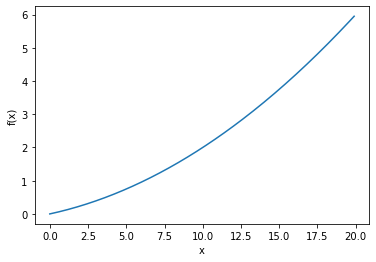

In [11]:
def function_1(x): #이차함수
    return 0.01*x**2 + 0.1*x 

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [17]:
print('x = 5일때 미분 : ', numerical_diff(function_1, 5))  #True : 0.2
print('x = 10일때 미분 : ', numerical_diff(function_1, 10))  #True : 0.3

x = 5일때 미분 :  0.1999999999990898
x = 10일때 미분 :  0.2999999999986347


0.1999999999990898


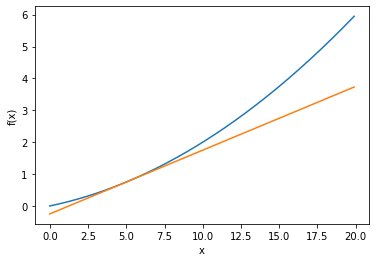

In [19]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()  #매우 유사하다.

In [22]:
def function_2(x):
    return np.sum(x**2)

#x0 = 3, x1 = 4 일 때 편미분
#x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [23]:
#x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [27]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) #x와 같은 형상의 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx] 
        #f(x+h)계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [82]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


경사하강법 : 손실함수의 최솟값을 기울기를 통해서 찾는다. <br>
기울어진 방향으로 조금씩 이동하면서 함수 값을 점차 줄이는 것.<br>

$$x_0 = x_0 - \eta \frac{\sigma f}{\sigma x_0}$$<br>
$$x_1 = x_1 - \eta \frac{\sigma f}{\sigma x_1}$$
$\eta$ : 학습률 <br>
이 단계를 계속 반복해나간다

In [37]:
#경사하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append( x.copy() )
        
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x, np.array(x_history)

In [53]:
#예제 : f(x0,x1) = x0^2 + x1^2의 최솟값을 구할
def function_2(x):
    return np.sum(x**2)

init_x = np.array([-3.0,4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
x
#True : (0,0) 과 매우 가까운 값
#학습률이 너무 크거나 작으면 정확한 값을 못찾는다. > 하이퍼파라미터 튜닝의 중요성

array([-6.11110793e-10,  8.14814391e-10])

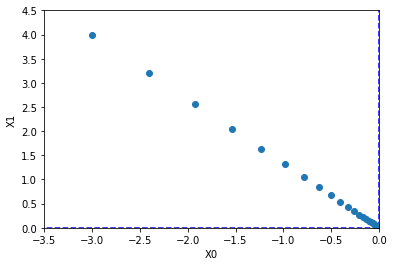

In [51]:
# 그래프로 표시
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 0)
plt.ylim(0, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

신경망에서의 기울기 적용

In [71]:
from common.functions import softmax, cross_entropy_error

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [91]:
net = simpleNet()
print(net.W) #가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t=np.array([0,0,1]) #True
print(net.loss(x,t))

[[ 1.69446892  0.12525141 -0.34037648]
 [ 0.82770036 -0.13548651  1.11277448]]
[ 1.76161167 -0.04678702  0.79727114]
0
1.3994617274365944


In [92]:
#기울기 구하기
from common.gradient import numerical_gradient 

def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)
# 11은 - 방향으로 갱신시키고 13은 + 방향으로 갱신시켜야겠다!

[[ 0.38831142  0.06365061 -0.45196204]
 [ 0.58246713  0.09547592 -0.67794305]]
